In [1]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import scipy

In [2]:
print("Versions")
print(f"tensorflow : {tf.__version__}")
print(f"numpy : {np.__version__}")
print(f"opencv : {cv2.__version__}")

Versions
tensorflow : 2.13.0
numpy : 1.24.3
opencv : 4.11.0


In [3]:
root_dataset_path= r"C:\Users\Dell\Desktop\FYP\ML Training\Tomato_dataset - Copy"

In [4]:
os.listdir(root_dataset_path)

['test', 'train', 'valid']

In [5]:
classes = os.listdir(root_dataset_path + '/train')
classes

['Bacterial_Spot',
 'Early_Blight',
 'Healthy',
 'Mosaic_Virus',
 'Septoria_Leaf_spot',
 'Yellow_Leaf_Curl_Virus']

In [6]:
def walk_through_dir(root_folder_path):
    for (dir_path,dir_names,file_names) in os.walk(root_folder_path):
        print(f'There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}')

walk_through_dir(root_dataset_path)

There are 3 directories and 0 images in C:\Users\Dell\Desktop\FYP\ML Training\Tomato_dataset - Copy
There are 6 directories and 0 images in C:\Users\Dell\Desktop\FYP\ML Training\Tomato_dataset - Copy\test
There are 0 directories and 200 images in C:\Users\Dell\Desktop\FYP\ML Training\Tomato_dataset - Copy\test\Bacterial_Spot
There are 0 directories and 200 images in C:\Users\Dell\Desktop\FYP\ML Training\Tomato_dataset - Copy\test\Early_Blight
There are 0 directories and 200 images in C:\Users\Dell\Desktop\FYP\ML Training\Tomato_dataset - Copy\test\Healthy
There are 0 directories and 200 images in C:\Users\Dell\Desktop\FYP\ML Training\Tomato_dataset - Copy\test\Mosaic_Virus
There are 0 directories and 200 images in C:\Users\Dell\Desktop\FYP\ML Training\Tomato_dataset - Copy\test\Septoria_Leaf_Spot
There are 0 directories and 200 images in C:\Users\Dell\Desktop\FYP\ML Training\Tomato_dataset - Copy\test\Yellow_Leaf_Curl_Virus
There are 6 directories and 0 images in C:\Users\Dell\Desktop\

In [7]:
def view_random_image(target_dir,target_class):

    '''
    View some random images of the target_class from the train/test dataset(target_dir).

    Arguments:
        target_dir: (str) the train_data_path or the test_data_path
        target_class: (str) the name of the class inside whoose image is to be viewed randomly

    '''
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import random
    import os
    import cv2

    target_folder = target_dir + "/" + target_class

    #get a sample random image from the the target_folder
    random_image = random.sample(os.listdir(target_folder), 1)

    #plot and visualise the image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    # show the shape of the image
    print(f"Image shape: {img.shape}")

Image shape: (256, 256, 3)


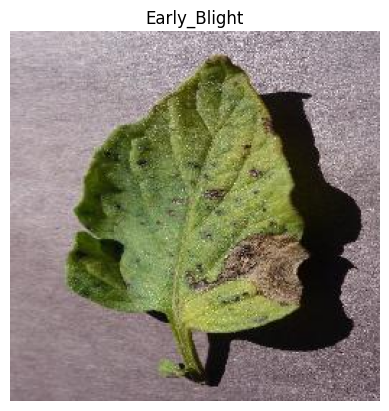

In [8]:
random_class = random.choice(classes)
view_random_image(root_dataset_path + '/train',random_class)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_path = root_dataset_path + '/train'
test_data_path = root_dataset_path + '/valid'

train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode="nearest").flow_from_directory(train_data_path,
                                                                          batch_size = 32,
                                                                          target_size = (224,224),
                                                                          seed = 42,
                                                                          class_mode = "categorical",
                                                                          shuffle = "True")
test_data_gen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode="nearest").flow_from_directory(test_data_path,
                                                                          batch_size = 32,
                                                                          target_size = (224,224),
                                                                          class_mode = "categorical",
                                                                          seed = 42,
                                                                          shuffle = "True")

Found 11061 images belonging to 6 classes.
Found 1560 images belonging to 6 classes.


In [10]:

#  CNN Model
model_1 = tf.keras.Sequential([
    # First Convolutional Block
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2),

    # Global Average Pooling & Dense Layers
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation="softmax")
], name="model_advanced")


In [11]:
model_1.compile(
    loss="categorical_crossentropy",  # Loss function for multi-class classification
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01) ,  # optimizer
    metrics=[
        'Accuracy',                      # accuracy
        tf.keras.metrics.Precision(),    # Precision: True Positives / (True Positives + False Positives)
        tf.keras.metrics.Recall(),       # Recall: True Positives / (True Positives + False Negatives)
    ]
)

# Summary of the model for confirmation
model_1.summary()


Model: "model_advanced"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 220, 220, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                    

In [12]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='tomato_model.h5',            # Path to save the model
    monitor="val_loss",                  # Metric to monitor (e.g., validation loss)
    save_best_only=True,                 # Save only the best model
    save_weights_only=False,             # Save the entire model (weights + architecture)
    mode="min",                          # 'min' for metrics like loss, 'max' for accuracy
    verbose=1                            # Print info when saving
)


In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 2 epochs if no improvement
    mode='min',          # Minimize validation loss
    restore_best_weights=True,  # Restore model to best state
    verbose=1
)

In [14]:

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",   # Reduce LR when val_loss stops improving
    factor=0.5,           # Reduce LR by half
    patience=2,           # Wait 3 epochs before reducing LR
    min_lr=1e-6           # Minimum possible LR
)



In [15]:
history  = model_1.fit(
    train_data_gen,
    epochs = 40,
    steps_per_epoch = 50,
    validation_data = test_data_gen,
    validation_steps = 40,
    callbacks = [model_checkpoint,
                 early_stopping,
                 lr_scheduler]
    
)

history

Epoch 1/40
50/50 [==============================] - ETA: 0s - loss: 1.2617 - Accuracy: 0.5688 - precision: 0.6510 - recall: 0.4837 

KeyboardInterrupt: 

In [ ]:
model = tf.keras.models.load_model("tomato_model.h5")

In [ ]:
import json
import numpy as np

# Convert history to a JSON-serializable format
history_dict = {key: [float(val) for val in value] for key, value in history.history.items()}

# Print the history
for key, value in history_dict.items():
    print(f"{key}: {value}")

# Save to a file
with open("training_history.json", "w") as file:
    json.dump(history_dict, file, indent=4)

print("Training history saved to training_history.json")


In [ ]:
import json
import matplotlib.pyplot as plt

# Load training history from JSON file
with open("training_history.json", "r") as file:
    history = json.load(file)

# Extract loss and accuracy data
loss = history['loss']
val_loss = history['val_loss']
accuracy = history['Accuracy']
val_accuracy = history['val_Accuracy']

epochs = range(1, len(loss) + 1)    

# Create a figure with two subplots (Loss and Accuracy)
plt.figure(figsize=(14, 6))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'ro-', label='Training Loss')     # Red circles
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')  # Red dashed line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'go-', label='Training Accuracy')    # Green circles
plt.plot(epochs, val_accuracy, 'g--', label='Validation Accuracy')  # Green dashed line
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_data_path = root_dataset_path + '/test'


test_data_gen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode="nearest").flow_from_directory(train_data_path,
                                                                          batch_size = 64,
                                                                          target_size = (224,224),
                                                                          seed = 42,
                                                                          class_mode = "categorical",
                                                                          shuffle = "True")


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Paths
train_data_path = root_dataset_path + "/test"

# Load test data using ImageDataGenerator (without augmentation)
train_data_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
    shuffle=False  # Important: Do not shuffle for correct label order
)

# Load the trained model
model = tf.keras.models.load_model('tomato_model.h5')

# Get class labels
class_names = list(train_data_gen.class_indices.keys())

# Predict on test data
y_pred_probs = model.predict(train_data_gen)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true = train_data_gen.classes  # True labels from generator

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))
